# 🚢 Titanic Survival Prediction

## 📌 Project Overview
This project aims to predict whether a passenger survived the Titanic disaster or not, 
based on features like **age, gender, ticket class, and fare**.  

The workflow includes:
1. Data Exploration
2. Data Cleaning & Preprocessing
3. Feature Engineering
4. Model Training
5. Model Evaluation
6. Saving the Model


## 📌 Step 1: Import Required Libraries
We will import all the necessary Python libraries for:
- Data manipulation (Pandas, NumPy)  
- Visualization (Matplotlib, Seaborn)  
- Machine learning (Scikit-learn)  
- Model saving (Joblib)  


In [52]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Additional Models to ML Models & Compare Performance
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# OS Library
import os

# Save Model
import joblib


## 📂 Step 2: Load Dataset
Now, we will load the Titanic dataset (`train.csv`) and look at the first few rows 
to understand the structure.


In [53]:
# Load Titanic Dataset
data = pd.read_csv("train.csv")

# Display first 5 rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 📊 Step 3: Explore the Dataset
Let's check:
- Dataset information
- Missing values
- Statistical summary


In [54]:
# Dataset info
print(data.info())

# Missing values
print("\nMissing Values:\n", data.isnull().sum())

# Statistical summary
print("\nSummary Statistics:\n", data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked    

## 🧹 Step 4: Data Cleaning
We need to handle:
- Missing values in **Age**, **Cabin**, and **Embarked**
- Drop irrelevant columns (**Name**, **Ticket**, **Cabin**) since they don’t add much value  


In [55]:
# Drop irrelevant columns
data.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

# Fill missing Age with median
data["Age"] = data["Age"].fillna(data["Age"].median())

# Fill missing Embarked with mode
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

# Verify missing values again
print("Missing Values after cleaning:\n", data.isnull().sum())


Missing Values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


## 🔄 Step 5: Encode Categorical Variables
We will convert categorical features into numeric format:
- **Sex** → 0 = female, 1 = male
- **Embarked** → Encoded into 0, 1, 2


In [56]:
# Encode categorical columns
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])
data["Embarked"] = le.fit_transform(data["Embarked"])

# Show first 5 rows after encoding
data.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


## 🎯 Step 6: Define Features (X) and Target (y)
We will separate the dataset into:
- **X (features)** → independent variables
- **y (target)** → Survived column


In [57]:
# Drop 'Survived' (target) and 'PassengerId' (not useful) from features
X = data.drop(["Survived", "PassengerId"], axis=1)
y = data["Survived"]

print("✅ Features shape:", X.shape)
print("✅ Target shape:", y.shape)


✅ Features shape: (891, 7)
✅ Target shape: (891,)


## ✂️ Step 7: Train-Test Split
We will split the dataset into:
- **Training set (80%)** → used for training the model
- **Testing set (20%)** → used for evaluating the model


In [58]:
# Split data into training and testing sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (712, 7)
Testing set shape: (179, 7)


## ⚖️ Step 8: Feature Scaling
We will standardize our features so that all values lie on the same scale.
This helps the model train more effectively.


In [59]:
# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train & test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Feature scaling applied successfully!")


✅ Feature scaling applied successfully!


## 🤖 Step 9: Train Model (Logistic Regression)
We will use Logistic Regression as our first ML model to predict survival.


In [60]:
# Initialize model
model = LogisticRegression()

# Train model
model.fit(X_train, y_train)

print("✅ Model training complete!")


✅ Model training complete!


## 📊 Step 10: Evaluate Model
We will check:
- Accuracy Score
- Confusion Matrix
- Classification Report


In [61]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


🎯 Accuracy: 0.8044692737430168

Confusion Matrix:
 [[90 15]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



## 🚀 Step 11: Try Multiple ML Models & Compare  

To make our Titanic survival prediction model more professional, we will try multiple Machine Learning algorithms and compare their performance:  

- Decision Tree  
- Random Forest  
- Support Vector Machine (SVM)  
- K-Nearest Neighbors (KNN)  

We will evaluate each model using **Accuracy Score** and then compare results to select the best model.  


In [62]:
# Define models
models = {
    "Logistic Regression": model,  # already trained
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train & evaluate models
results = {}
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Show comparison
print("\n📊 Model Comparison:")
for k, v in results.items():
    print(f"{k}: {v:.4f}")


Logistic Regression Accuracy: 0.8045
Decision Tree Accuracy: 0.7821
Random Forest Accuracy: 0.8212
SVM Accuracy: 0.8156
KNN Accuracy: 0.8045

📊 Model Comparison:
Logistic Regression: 0.8045
Decision Tree: 0.7821
Random Forest: 0.8212
SVM: 0.8156
KNN: 0.8045


## 📊 Step 12: Model Performance Visualization  

To make the comparison more clear and professional, we will visualize the accuracy scores of all models using a bar chart.


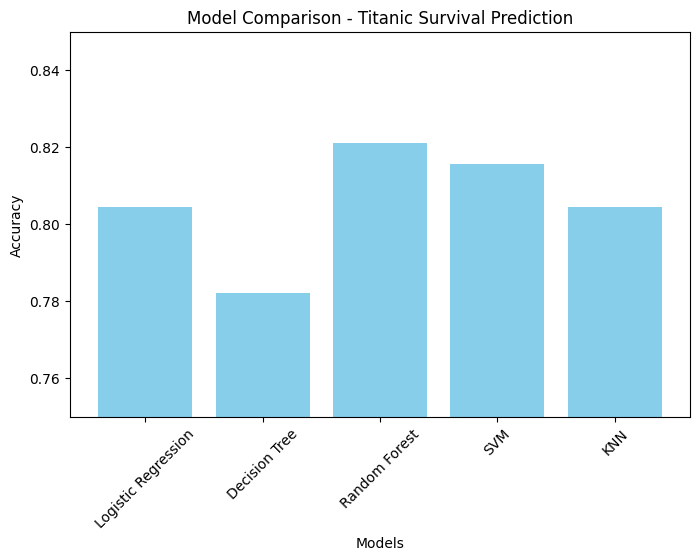

In [63]:
# Plot model comparison
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Titanic Survival Prediction")
plt.xticks(rotation=45)
plt.ylim(0.75, 0.85)  # zoomed-in range for better visibility
plt.show()


## 🛠 Step 11: Save Best Model with Joblib  

Now that we have trained and compared multiple ML models, we will save the **best performing model (Random Forest)** using `joblib`.  
This allows us to reuse the trained model later without retraining, which is especially useful when deploying the model in a Streamlit app.  

We will save the model inside a dedicated folder: **Titanic_Survival_Joblib**.  


In [65]:
# Create folder if it doesn't exist
os.makedirs("Titanic_Survival_Joblib", exist_ok=True)

# Train best model again (Random Forest)
best_model = RandomForestClassifier(random_state=42, n_estimators=100)
best_model.fit(X_train, y_train)

# Save model using joblib
joblib.dump(best_model, "Titanic_Survival_Joblib/titanic_model.joblib")

print("✅ Model saved as 'Titanic_Survival_Joblib/titanic_model.joblib'")


✅ Model saved as 'Titanic_Survival_Joblib/titanic_model.joblib'


## 🚀 Step 12: Build Streamlit App for Deployment  

We will now create a **Streamlit app (`app.py`)** that:  
1. Loads our saved Random Forest model (`titanic_model.joblib`).  
2. Takes passenger details as user input.  
3. Predicts whether the passenger survived or not.  
